# House Price Analysis of Ames, Iowa (2006-2010)

                                                                                
In this notebook, I take a look at this small competition dataset (one town in Iowa) to have a peak of real estate sales. And based on the dataset scope, I aim to answer the following questions:

 - 1. How expensive is this town to live in?
 - 2. How do real estate markets differ for different neighborhoods in Ames,Iowa?
 - 3. How much shoud I budget for if I were to buy a house in Ames that fits my preferences?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# load data
data = pd.read_csv('data/train.csv')
print("Basic description of dataset: ")
print ('\t'+"{} rows".format(data.shape[0]))
print ('\t'+"{} columns".format(data.shape[1]))

Basic description of dataset: 
	1460 rows
	81 columns


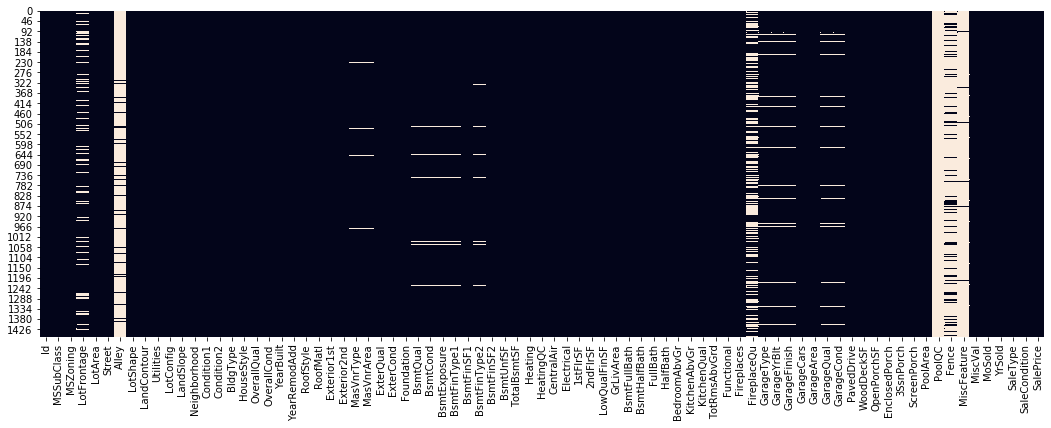

In [3]:
plt.figure(figsize=(18,6))
sns.heatmap(data.isnull(),cbar=False)

### Question 1 How expensive is this town to live in?

To gain a basic picture of the house market of Ames, we'll first take look at the distribution of house sale price:

In [4]:
print("Number of rows that are missing sale price : {}"
      .format(data.SalePrice.isnull().sum()))

Number of rows that are missing sale price : 0


In [5]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

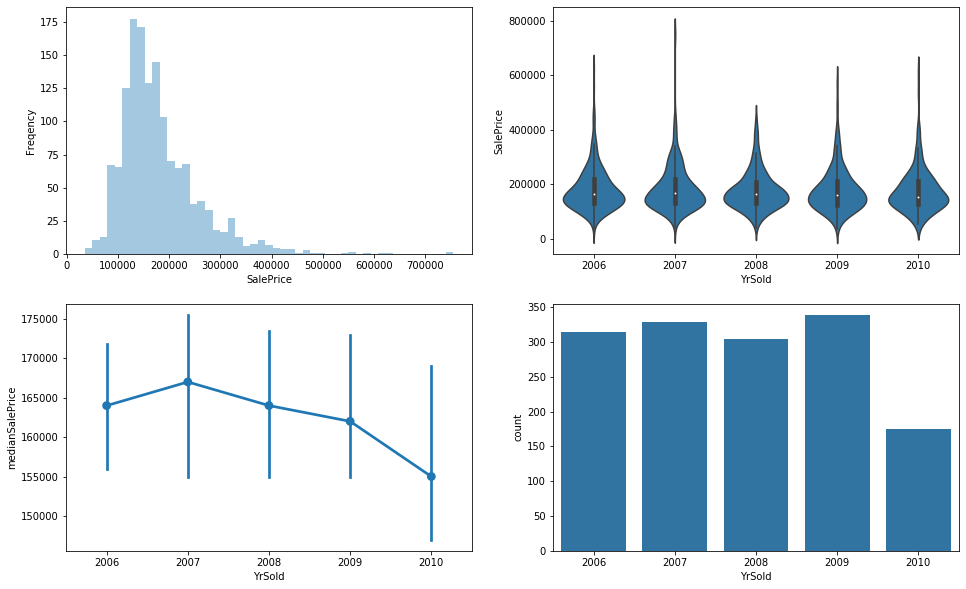

In [7]:
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.distplot(data.SalePrice,kde=False)
plt.ylabel("Freqency")
plt.subplot(222)
base_color = sns.color_palette()[0]
sns.violinplot(data=data,x="YrSold",y='SalePrice',color=base_color)
plt.subplot(223)
from numpy import median
sns.pointplot(data=data,x="YrSold",y='SalePrice',estimator=median)
plt.ylabel("medianSalePrice")
plt.subplot(224)
sns.countplot(data.YrSold,color=base_color)

### Question 2 which are the popular neighborhoods?

In [8]:
data[['Neighborhood','YearBuilt']].isnull().sum()

Neighborhood    0
YearBuilt       0
dtype: int64

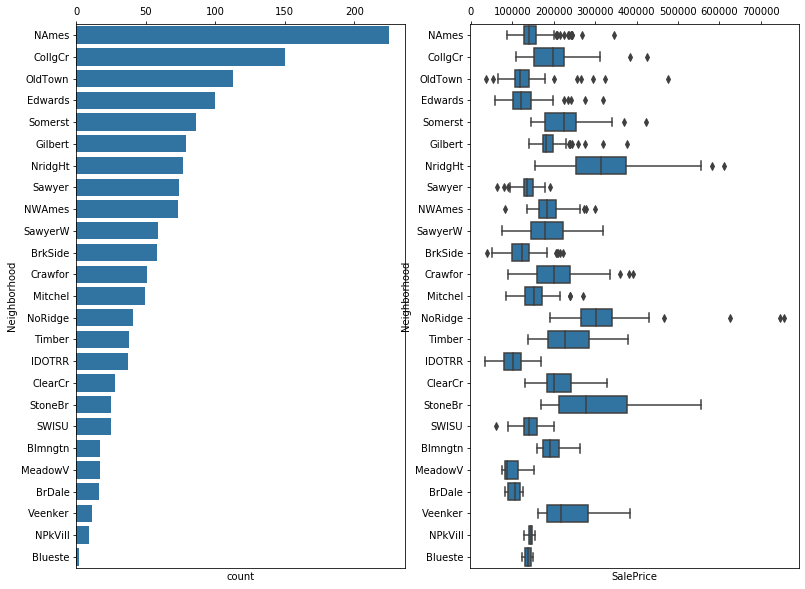

In [9]:
plt.figure(figsize=(20,10))
cat_order = data.Neighborhood.value_counts().index
plt.subplot(131)
ax1 = sns.countplot(data=data,y='Neighborhood',color=base_color,order=cat_order)
ax1.xaxis.tick_top()
plt.subplot(132)
ax2 = sns.boxplot(data=data,y="Neighborhood",x='SalePrice',color=base_color,order=cat_order)
ax2.xaxis.tick_top()

### Question 3: How much shoud I budget for if I were to buy a house in Ames that fits my preferences?

In [10]:
data[['Neighborhood','YearBuilt','LotArea','BedroomAbvGr','FullBath']].isnull().sum()

Neighborhood    0
YearBuilt       0
LotArea         0
BedroomAbvGr    0
FullBath        0
dtype: int64

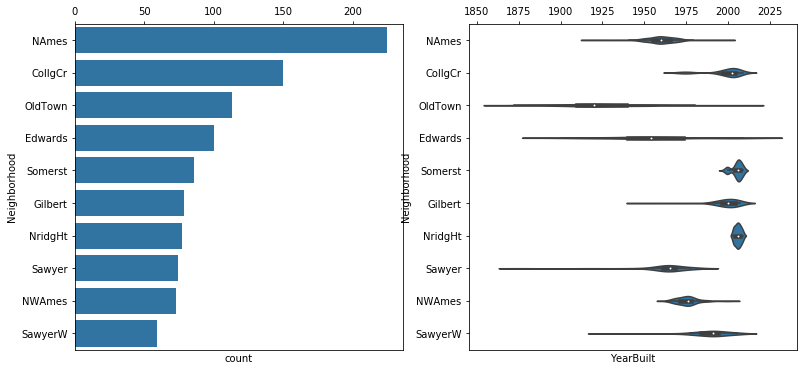

In [11]:
plt.figure(figsize=(20,6))
cat_order = data.Neighborhood.value_counts().index
plt.subplot(131)
ax1 = sns.countplot(data=data,y='Neighborhood',color=base_color,order=cat_order[:10])
ax1.xaxis.tick_top()
plt.subplot(132)
ax2 = sns.violinplot(data=data,y="Neighborhood",x='YearBuilt',color=base_color,order=cat_order[:10])
ax2.xaxis.tick_top()

In [12]:
preferred_neighborhood=['NAmes','CollgCr','Somerst','Gilbert','NridgHt','SawyerW']

In [13]:
fits=data[(data.Neighborhood.isin(preferred_neighborhood))\
     &(data.YearBuilt>=1980)\
    &(data.BedroomAbvGr.isin([3,4]))\
      &(data.FullBath.isin([3,4]))]

In [28]:
fits.SalePrice.describe()

count         9.000000
mean     375846.777778
std      105747.651965
min      227875.000000
25%      325300.000000
50%      342643.000000
75%      424870.000000
max      582933.000000
Name: SalePrice, dtype: float64